# 4장 머신러닝에 필요한 수학의 기본

## 4.1 벡터

In [1]:
import numpy as np   #numpy 라이브러리 import 

In [2]:
a = np.array([2,1])
print(a)

[2 1]


In [3]:
type(a)

numpy.ndarray

In [4]:
c=np.array([[1,2],[3,4]]) #2X2 2차원 행렬
print(c)

[[1 2]
 [3 4]]


In [5]:
d=np.array([[1],[2]]) #2X1 2차원 행렬
print(d)

[[1]
 [2]]


In [6]:
print(d.T)   #전치로 나타내기

[[1 2]]


In [7]:
a = np.array([2,1])
b = np.array([1,3])
print(a+b)         #벡터의 덧셈

[3 4]


In [8]:
a = np.array([2,1])
b = np.array([1,3])
print(a-b)         #벡터의 뺄셈

[ 1 -2]


In [9]:
print(2 * a)       #스칼라 값 곱셈 

[4 2]


In [10]:
b = np.array([1,3])
c = np.array([4,2])
print(b.dot(c))     #변수명1.dot(변수명2) 로 내적을 계산

10


In [11]:
a = np.array([1,3])
print(np.linalg.norm(a))   #np.linalg.norm()으로 벡터의 크기를 구할 수 있다.

3.1622776601683795


## 합의 기호

In [12]:
import numpy as np
a = np.ones(1000)  #[1 1 1 ... 1]
b = np.arange(1, 1001)   #[1 2 3 ... 1000]
print(a.dot(b))          #for문을 사용하지 않고 내적으로 계산

500500.0


## 미분

머신러닝은 결국 함수에서 최소나 최대인 입력을 찾는 문제(최적화 문제)입니다. 함수의 최저지점은 기울기가 0이되는 성질이 있으므로 이러한 문제를 풀려면 함수의 기울기를 아는 것이 중요

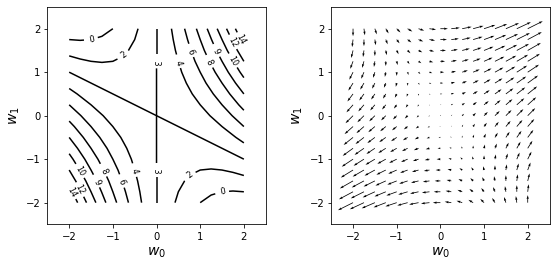

In [13]:
#경사를 그림으로 나타내기

import numpy as np
import matplotlib.pyplot as plt

def f(w0, w1):           #f정의
  return w0**2+2*w0*w1+3 
def df_dw0(w0, w1):      #f의 w0에 관한 편미분
  return 2*w0+2*w1
def df_dw1(w0,w1):       #f의 w1에 관한 편미분
  return 2*w0+0*w1

w_range = 2
dw = 0.25

w0=np.arange(-w_range, w_range + dw, dw) #범위
w1=np.arange(-w_range, w_range + dw, dw)
wn = w0.shape[0]
ww0, ww1 = np.meshgrid(w0,w1)          #격자 모양으로 나눈 w0과 w1을 2차원 배열 ww0과 ww1에 저장
ff = np.zeros((len(w0),len(w1)))       #모든 요소가 0
dff_dw0 = np.zeros((len(w0), len(w1))) #모든 요소가 0
dff_dw1 = np.zeros((len(w0), len(w1))) #모든 요소가 0
for i0 in range(wn):                      #ww0과ww1에 대한 f와 편미분 값이 계산
  for i1 in range(wn):
    ff[i1,i0] = f(w0[i0], w1[i1])
    dff_dw0[i1,i0] = df_dw0(w0[i0],w1[i1])
    dff_dw1[i1,i0] = df_dw1(w0[i0],w1[i1])

plt.figure(figsize=(9,4))                    #figure는 전체 영역 크기 지정          
plt.subplots_adjust(wspace=0.3)              #plt.sublots_adjust를 통해 좌우 및 상하 간격 조절
plt.subplot(1,2,1)                           #subplot을 통해 여러 좌표계 지정가능 
cont = plt.contour(ww0,ww1,ff,10,colors='k') #f의 등고선 표시
cont.clabel(fmt='%2.0f',fontsize=8)          #등고선에 숫자 넣기
plt.xticks(range(-w_range, w_range + 1, 1))  #눈금 제한
plt.yticks(range(-w_range, w_range + 1, 1))
plt.xlim(-w_range - 0.5, w_range + .5)       #x축 표시 범위  
plt.ylim(-w_range - .5, w_range + .5)        #y축 표시 범위
plt.xlabel('$w_0$', fontsize = 14)           #x 라벨
plt.ylabel('$w_1$', fontsize = 14)           #y 라벨


plt.subplot(1,2,2)
plt.quiver(ww0,ww1, dff_dw0, dff_dw1)    #f의 경사 벡터 표시(화살표)
plt.xlabel('$w_0$',fontsize = 14)
plt.ylabel('$w_1$',fontsize = 14)
plt.xticks(range(-w_range,w_range+1, 1))
plt.yticks(range(-w_range, w_range+1, 1))
plt.xlim(-w_range - 0.5, w_range + .5)
plt.ylim(-w_range - .5, w_range + .5)
plt.show()

왼쪽의 f 등고선 플롯의 수치를 보면 f는 오른쪽 위와 왼쪽 아래가 높고 , 왼쪽 위와 오른쪽 아래가 낮은 지형을 볼 수 있습니다. 오른쪽 화살표는 각 점에서 경사가 높은 쪽을 향하고 있습니다. 경사가 가파른 정도(등고선의 간격이 좁을수록)화살표가 긴 것을 알 수 있습니다. 머신러닝에서는 오차 함수의 최소점을 구하기 위해 오차 함수의 경사를 계산.

## 행렬

In [14]:
import numpy as np

A = np.array([[1,2,3],[4,5,6]])
print(A)

[[1 2 3]
 [4 5 6]]


In [15]:
B = np.array([[7,8,9],[10,11,12]])
print(B)

[[ 7  8  9]
 [10 11 12]]


In [16]:
print(A+B)
print(A-B)

[[ 8 10 12]
 [14 16 18]]
[[-6 -6 -6]
 [-6 -6 -6]]


In [17]:
A = np.array([1,2,3])
B = np.array([4,5,6])
print(A.dot(B))   #A.dot(B)는 내적에 국한된 연산이 아니라 행렬 곱을 계산한 연산.

32


In [18]:
A = np.array([1,2,3])
B = np.array([4,5,6])
print(A * B)      # *를 사용하면 요소끼리 곱셈 수행

[ 4 10 18]


In [19]:
A = np.array([1,2,3])
B = np.array([4,5,6])
print(A/B)        # /도 마찬가지로 요소끼리 나눗셈을 수행

[0.25 0.4  0.5 ]


In [20]:
A = np.array([[1,2,3],[-1,-2,-3]])
B = np.array([[4,-4],[5,-5],[6,-6]])
print(A.dot(B))  

[[ 32 -32]
 [-32  32]]


In [21]:
print(np.identity(3)) #단위 행렬 np.identity(n)에서 nXn 단위 행렬이 생성

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [22]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
I = np.identity(3)
print(A.dot(I))        #다른 행렬을 단위행렬에 곱해도 변하지 않는다.

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


In [23]:
A = np.array([[1,2],[3,4]])
invA = np.linalg.inv(A)  #np.linalg.inv(A)에서 A의 역행렬을 구할 수 있다.
print(invA)

[[-2.   1. ]
 [ 1.5 -0.5]]


In [24]:
A = np.array([[1,2,3],[4,5,6]])
print(A)
print(A.T) #A행렬의 전치

[[1 2 3]
 [4 5 6]]
[[1 4]
 [2 5]
 [3 6]]


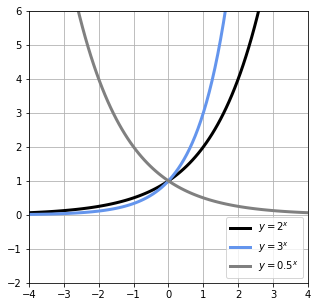

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = np.linspace(-4,4,100)
y=2**x
y2=3**x
y3 = 0.5**x

plt.figure(figsize=(5,5))     #전체 크기 영역 5X5
plt.plot(x,y,'black',linewidth=3, label='$y=2^x$')
plt.plot(x,y2,'cornflowerblue',linewidth=3,label = '$y=3^x$')
plt.plot(x,y3,'gray', linewidth=3,label='$y=0.5^x$')
plt.ylim(-2,6)                #y축 표시 범위
plt.xlim(-4,4)                #x축 표시 범위
plt.grid(True)                #grid
plt.legend(loc='lower right')
plt.show()

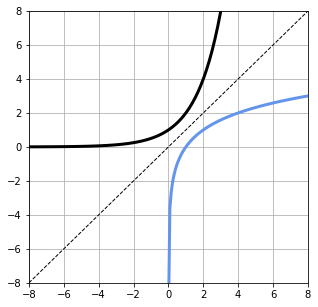

In [26]:
x = np.linspace(-8,8,100)
y = 2**x

x2= np.linspace(0.001, 8 ,100)  #np.log(0)는 에러가 되므로 0을 포함하지 않음
y2= np.log(x2)/ np.log(2)       #밑을 2로 한 log를 계산
plt.figure(figsize=(5,5))       #5x5영역
plt.plot(x,y,'black',linewidth=3)
plt.plot(x2,y2,'cornflowerblue',linewidth=3)
plt.plot(x,x, 'black',linestyle = '--',linewidth=1)
plt.ylim(-8,8)
plt.xlim(-8,8)
plt.grid(True)
plt.show()

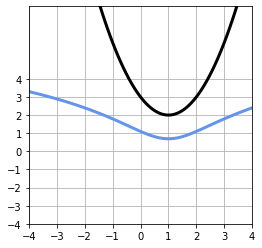

In [27]:
#로그
x = np.linspace(-4,4,100)
y = (x-1)**2 +2
logy = np.log(y)

plt.figure(figsize=(4,4))
plt.plot(x,y, 'black', linewidth=3)
plt.plot(x,logy,'cornflowerblue',linewidth=3)
plt.xticks(range(-4,9,1))
plt.yticks(range(-4,5,1))
plt.ylim(-4,8)
plt.xlim(-4,4)
plt.grid(True)
plt.show()

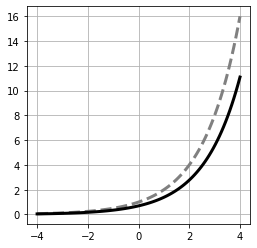

In [28]:
#지수 함수의 미분
x = np.linspace(-4,4,100)
a= 2
y = a**x
dy = np.log(a) * y

plt.figure(figsize=(4,4))
plt.plot(x,y,'gray',linestyle='--',linewidth=3)
plt.plot(x,dy,color='black',linewidth=3)
plt.ylim=(-1,8)
plt.xlim=(-4,4)
plt.grid(True)
plt.show()

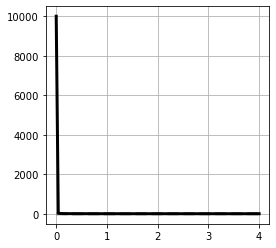

In [29]:
x = np.linspace(0.0001, 4, 100) # 0 이하로 정의할 수 없는.
y = np.log(x)
dy = 1 / x

plt.figure(figsize=(4,4))
plt.plot(x,y, 'gray', linestyle='--', linewidth=3)
plt.plot(x, dy, color='black', linewidth=3)
plt.ylim=(-8, 8)
plt.xlim=(-1, 4)
plt.grid(True)
plt.show()

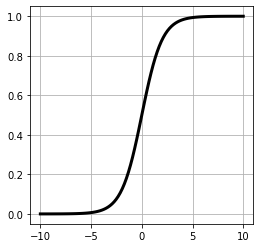

In [30]:
#시그모이드 함수
x = np.linspace(-10,10,100)
y = 1/(1+np.exp(-x))

plt.figure(figsize=(4,4))
plt.plot(x,y,'black',linewidth=3)

plt.ylim=(-1,2)
plt.xlim=(-10,10)
plt.grid(True)
plt.show()

In [31]:
#소프트맥스 함수
def softmax(x0,x1,x2):
  u = np.exp(x0)+np.exp(x1)+np.exp(x2)
  return np.exp(x0)/u,np.exp(x1)/u, np.exp(x2)/u

#Test
y = softmax(2,1,-1)
print(np.round(y,2)) #소수점 2자리로 최대한 가깝게 표시
print(np.sum(y))     #합계를 표시

[0.71 0.26 0.04]
1.0


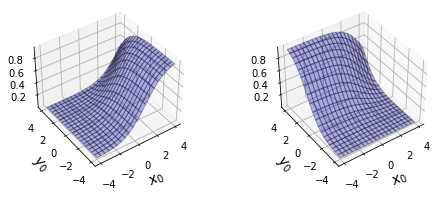

In [32]:
from mpl_toolkits.mplot3d import Axes3D

xn = 20
x0 = np.linspace(-4,4,xn)
x1 = np.linspace(-4,4,xn)

y = np.zeros((xn,xn,3))
for i0 in range(xn):
  for i1 in range(xn):
    y[i1,i0,:] = softmax(x0[i0],x1[i1],1)

xx0,xx1 = np.meshgrid(x0,x1)
plt.figure(figsize=(8,3))
for i in range(2):
  ax = plt.subplot(1,2, i+1, projection = '3d')
  ax.plot_surface(xx0, xx1, y[:,:,i],
                  rstride=1, cstride = 1, alpha =0.3,
                  color = 'blue',edgecolor='black')
  ax.set_xlabel('$x_0$',fontsize=14)
  ax.set_ylabel('$y_0$',fontsize=14)
  ax.view_init(40,-125)


plt.show()

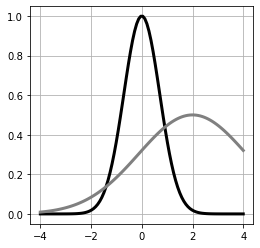

In [33]:
#가우스 함수
def gauss(mu, sigma, a):
  return a*np.exp(-(x - mu)**2 / sigma**2)

x=np.linspace(-4,4,100)
plt.figure(figsize=(4,4))
plt.plot(x,gauss(0,1,1), 'black', linewidth=3)
plt.plot(x,gauss(2,3,0.5), 'gray',linewidth=3)
plt.ylim=(-.5,1.5)
plt.xlim=(-4,4)
plt.grid(True)
plt.show()


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

#가우스 함수
def gauss(x,mu, sigma):
  N, D = x.shape
  c1 = 1 / (2*np.pi)**(D/2)
  c2 = 1 / (np.linalg.det(sigma)**(1/2))
  inv_sigma = np.linalg.inv(sigma)
  c3 = x - mu
  c4 = np.dot(c3, inv_sigma)
  c5 = np.zeros(N)
  for d in range(D):
    c5 = c5 + c4[:,d]*c3[:,d]
  p = c1 * c2 * np.exp(-c5/2)
  return p

In [35]:
x = np. array([[1,2],[2,1],[3,4]])
mu = np.array([1,2])
sigma = np.array([[1,0],[0,1]])
print(gauss(x,mu, sigma))

[0.15915494 0.05854983 0.00291502]


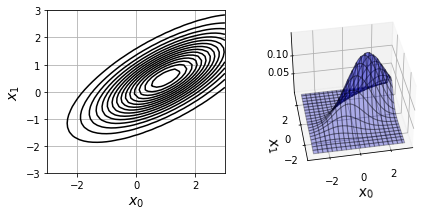

In [36]:
X_range0 = [-3,3]
X_range1= [-3,3]

# 등고선 표시 
def show_contour_gauss(mu, sig):
  xn = 40                                          # 등고선 표시 해상도
  x0 = np.linspace(X_range0[0], X_range0[1], xn)
  x1 = np.linspace(X_range1[0], X_range1[1], xn)
  xx0, xx1 = np.meshgrid(x0,x1)
  x = np.c_[np.reshape(xx0, xn * xn, 'F'), np.reshape(xx1, xn * xn, 'F')]
  f = gauss(x ,mu, sig)
  f = f.reshape(xn, xn)
  f = f.T
  cont = plt.contour(xx0, xx1, f, 15, colors='k')
  plt.grid(True)

#3D 표시 
def show3d_gauss(ax, mu, sig):
  xn = 40                                           #등고선 표시 해상도
  x0 = np.linspace(X_range0[0], X_range0[1], xn)
  x1 = np.linspace(X_range1[0], X_range1[1], xn)
  xx0, xx1 = np.meshgrid(x0,x1)
  x = np.c_[np.reshape(xx0, xn * xn, 'F'), np.reshape(xx1, xn * xn, 'F')]
  f = gauss(x, mu, sig)
  f = f.reshape(xn, xn)
  f = f.T
  ax.plot_surface(xx0, xx1, f, rstride=2, cstride=2, alpha=0.3, color='blue', edgecolor='black')

#메인 
mu = np.array([1, 0.5]) 
sigma = np.array([ [2,1], [1,1] ]) 
Fig = plt.figure(1, figsize=(7,3))
Fig.add_subplot(1,2,1)
show_contour_gauss(mu, sigma)
plt.xlim=(X_range0)
plt.ylim=(X_range1)
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
Ax = Fig.add_subplot(1,2,2,projection='3d')
show3d_gauss(Ax, mu, sigma)
Ax.set_zticks([0.05, 0.10])
Ax.set_xlabel('$x_0$', fontsize=14)
Ax.set_ylabel('$x_1$', fontsize=14)
Ax.view_init(40, -100)
plt.show()